In [117]:
# !pip install numpy matplotlib scikit-learn

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [119]:
# Charger les données MNIST
# digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
digits = [0, 1]

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data[:2000]  # Utiliser un sous-ensemble pour la rapidité
y = mnist.target[:2000].astype(int)

mask = np.array([l in digits for l in y])
X = X[mask]
y = y[mask]


X.iloc[0]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 1, Length: 784, dtype: int64

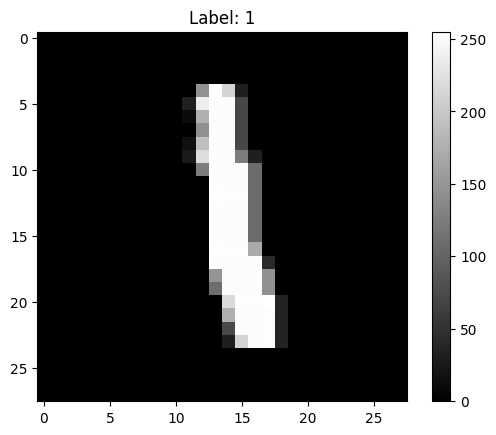

In [120]:
# Check if X is a DataFrame and convert the first row to a numpy array for visualization
def visualize_image(loc, X, y):
    if isinstance(X, pd.DataFrame):
        image_matrix = X.iloc[loc].values.reshape(28, 28)
        y = y.to_numpy()
    else:
        image_matrix = X[loc].reshape(28, 28)

    # Visualize the image
    plt.imshow(image_matrix, cmap='gray')
    try:
        plt.title(f"Label: {y[loc]}")
    except:
        plt.title('Label: undifined')
    plt.colorbar()
    plt.show()

# Visualize the first image
visualize_image(2, X, y)

In [121]:
# Standardisation des données
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [122]:
# Calcul de la matrice de covariance
cov_matrix = np.cov(X_std, rowvar=False)

In [123]:
# Calcul des valeurs propres et des vecteurs propres
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)


In [124]:
# Tri des vecteurs propres par ordre décroissant des valeurs propres
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]

# Visualisation dimensionnelle

## PCA 2D

In [125]:
# Sélectionner les deux premiers vecteurs propres pour la visualisation
k = 2
projection_matrix = eigenvectors[:, :k]

In [126]:
# Projection des données dans le nouvel espace
X_pca = np.dot(X_std, projection_matrix)

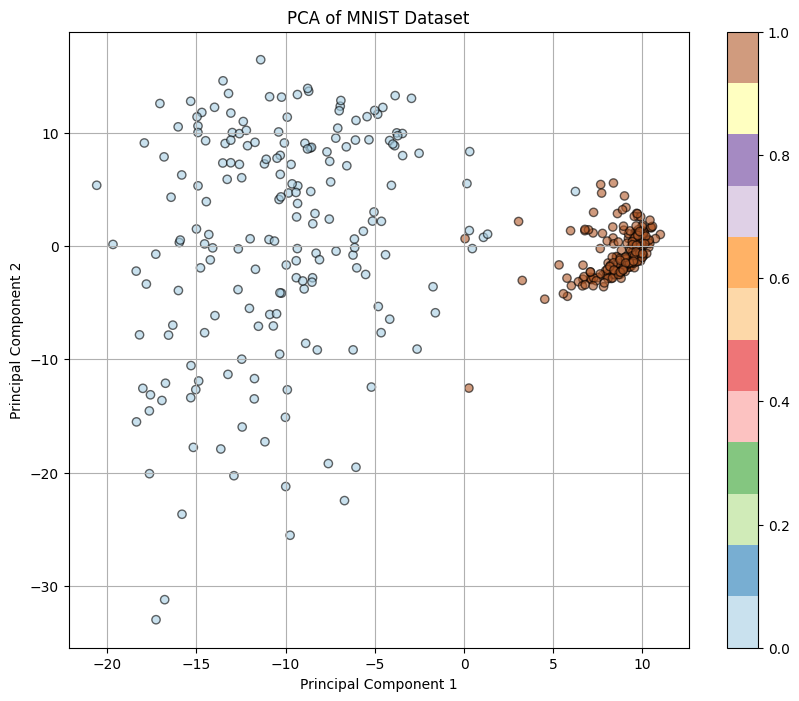

In [127]:
# Visualisation des données réduites
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Paired', alpha=0.6, edgecolor='k')
plt.colorbar(scatter)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MNIST Dataset')
plt.grid(True)
plt.show()


## PCA 3D

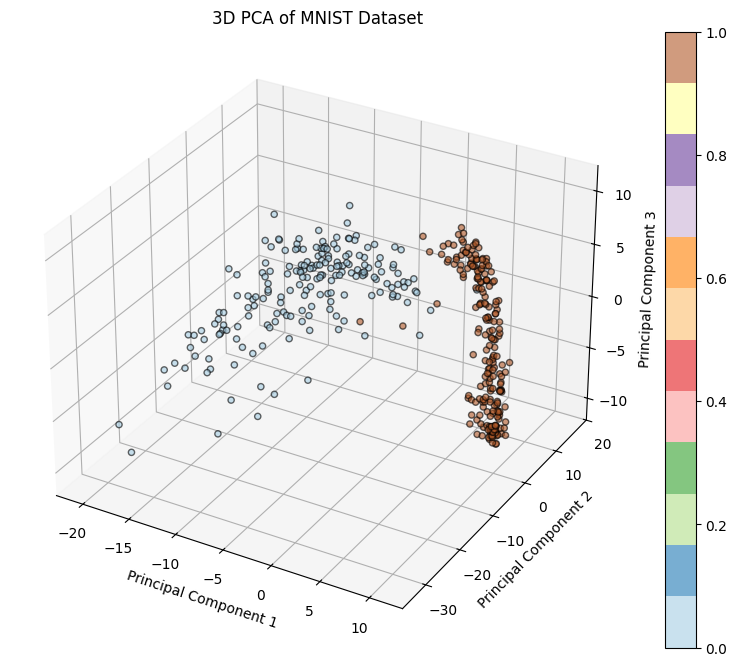

In [128]:


k = 3
projection_matrix3d = eigenvectors[:, :k]

# Project the data onto the top three eigenvectors
X_pca3d = np.dot(X_std, projection_matrix3d)

# 3D Visualization of the PCA-reduced data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca3d[:, 0], X_pca3d[:, 1], X_pca3d[:, 2], c=y, cmap='Paired', alpha=0.6, edgecolor='k')
plt.colorbar(scatter)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of MNIST Dataset')
plt.show()

# Compression et reconstruction

In [129]:
def pca_n_components(n, X_std):
    
    k = n
    projection_matrix = eigenvectors[:, :k]
    X_pca = np.dot(X_std, projection_matrix)
    X_pca_reconstructed = np.dot(X_pca, projection_matrix.T)
    return X_pca, X_pca_reconstructed



[ 9.2935717  -1.64715342  6.64760622  2.05450862 -0.70329554  1.65874964
  0.44750213  1.86693689 -1.39499878 -1.51803141 -0.83924749 -0.87267473
  0.55867527 -0.69328808  0.60795386  1.17751681 -1.77283253 -0.25011803
 -1.31153391  0.32165728]


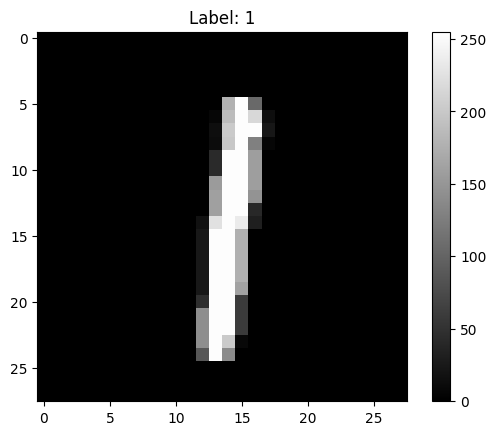

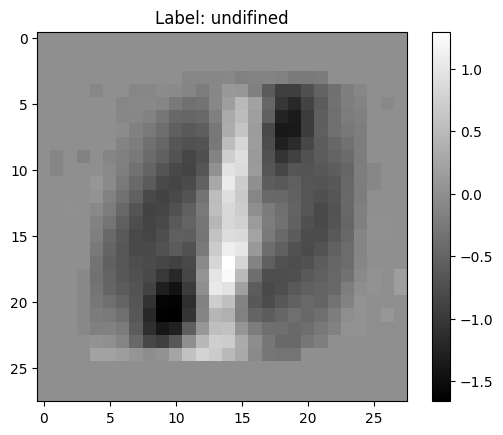

In [130]:
X_pca, X_pca_reconstructed = pca_n_components(20, X_std)
# print(X_pca, X_pca_reconstructed)

print(X_pca[10])

visualize_image(10, X, y)
visualize_image(10, X_pca_reconstructed, y)

In [131]:
type(X_pca)
print(X_pca.shape[1])

20


# Gen Data with PCA

In [133]:
def GenDataWithPCA(n, X_std, number_samples = 1,):
    
    k = n
    projection_matrix = eigenvectors[:, :k]
    X_pca = np.dot(X_std, projection_matrix)
    
    
    
    new_vec = np.zeros((number_samples, n))
    
    for j in range(number_samples):
        for i in range(X_pca.shape[1]):
            new_val = np.random.uniform(min(X_pca[:, i]), max(X_pca[:, i]))
            new_vec[j, i] = new_val
            
    X_pca_reconstructed = np.dot(new_vec, projection_matrix.T)
    
    return new_vec, X_pca_reconstructed
    
    

[[ 2.06422988 -0.9906665  -0.51035224 -9.63214984 -1.89578549]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.0000000

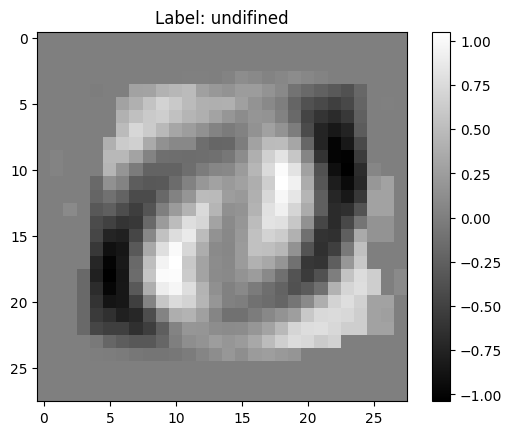

In [134]:
new_vec, X_pca_reconstructed = GenDataWithPCA(5, X_std, 1)

print(new_vec)
print(X_pca_reconstructed)

visualize_image(0, X_pca_reconstructed, y)